# Baseline Models (Airbnb and Assessor) - No Geospatial Data

This notebook is meant to have examples of all of the baseline models for the Airbnb and Assessor dataset. That said, I have included the the ability to load and add the geospatial data, just for comparisons sake.

In [40]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import seaborn as sns
from cap_functs import rmse, mae, median_error, find_neigh_cnt, find_cnts_per_cat, compile_model_data
from cap_functs import percent_within_x, print_percents, print_percents_log, convert_mp_vals

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KDTree
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.metrics import median_absolute_error, make_scorer

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

In [2]:
# rec_311_dt = pd.read_pickle('../ga_project_data/rec_311_dt')
# print max(rec_311_dt.Opened)
# rec_15up = rec_311_dt[rec_311_dt.Opened >= datetime.datetime(2015, 1, 1)]
# rec_15up = rec_15up[rec_15up.Point.notnull()]
# rec_15up['latitude'] = rec_15up.Point.apply(lambda x: map(float, x.strip('()').split(', '))[0])
# rec_15up['longitude'] = rec_15up.Point.apply(lambda x: map(float, x.strip('()').split(', '))[1])
# del rec_311_dt

In [3]:
# short_311_cats = ['Street and Sidewalk Cleaning', 'Damaged Property', 'SFHA Requests', 
#                   'Street Defects', 'Sidewalk or Curb', 'Color Curb', 'Graffiti']

In [4]:
# crimes_sf_dt = pd.read_pickle('../ga_project_data/crimes_sf_dt')

# crime_15up = crimes_sf_dt[crimes_sf_dt.Date >= datetime.datetime(2015, 1, 1)]
# crime_15up = crime_15up.rename(columns={'X': 'longitude', 'Y': 'latitude'})
# del crimes_sf_dt

In [5]:
# short_crime_cats = ['LARCENY/THEFT', 'VEHICLE THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 
#                     'BURGLARY', 'ROBBERY', 'LOITERING', 'NON-CRIMINAL', 'WEAPON LAWS']

In [6]:
# park_reg_pts = pd.DataFrame(gpd.read_file('./map_data/park_reg_pts/park_reg_pts.shp'))
# park_reg_pts['geometry'] = park_reg_pts.geometry.apply(str, convert_dtype=str)
# park_reg_pts = convert_mp_vals(df=park_reg_pts, column='geometry')
# park_reg_pts = park_reg_pts[np.random.choice(park_reg_pts.shape[0], 
#                                              len(park_reg_pts), replace=False), :]

In [7]:
# ldn_76 = pd.read_pickle('ldn_76')
# ldn_74 = pd.read_pickle('ldn_74')
# ldn_72 = pd.read_pickle('ldn_72')
# ldn_70 = pd.read_pickle('ldn_70')
# ldn_66 = pd.read_pickle('ldn_66')

In [8]:
bnb_list_full = pd.read_pickle('./bnb_list_full')
# bnb_list_full = pd.read_pickle('./bnb_list_full_geo')
bnb_list_test = pd.DataFrame(bnb_list_full)
bnb_list_test = bnb_list_test[bnb_list_test.reviews_per_month > 0.2]
bnb_list_test.shape

(5187, 91)

In [9]:
# bnb_list_test = compile_model_data('crime and 311', bnb_list_test, short_311_cats, 
#                                    short_crime_cats, crime_15up, rec_15up, 
#                                    r_crime=0.004, r_311=0.004)


In [10]:
# bnb_list_test = find_neigh_cnt('park_reg_pts', park_reg_pts, bnb_list_test, r=0.004)

In [11]:
# bnb_list_test = find_neigh_cnt('ldn_76', ldn_76, bnb_list_test, r=0.0012)
# bnb_list_test = find_neigh_cnt('ldn_74', ldn_74, bnb_list_test, r=0.0012)
# bnb_list_test = find_neigh_cnt('ldn_72', ldn_72, bnb_list_test, r=0.0012)
# bnb_list_test = find_neigh_cnt('ldn_70', ldn_70, bnb_list_test, r=0.0012)
# bnb_list_test = find_neigh_cnt('ldn_66', ldn_66, bnb_list_test, r=0.0012)

## Airbnb models (log_transform comparison)

In [12]:
# Predictors and target
# drop_cols = ['price_mod', 'price_y', 'price', 'latitude', 'longitude', 
#              'amenities']
drop_cols = ['id', 'price_mod', 'price_y', 'price', 'latitude', 'longitude', 
             'amenities', 'geometry', 'census_tract']
keep_cols = [x for x in bnb_list_test.columns.values if x not in drop_cols]
X = bnb_list_test[keep_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)

y = bnb_list_test.price.values
yl = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X, yl, test_size=0.3, random_state=101)


In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print rmse(y_pred, y_test), '  ', np.sqrt(rmse(y_pred, y_test))
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)
linreg.score(X_test, y_test)

97.1606975931    9.85701260997
56.5194269373
36.5075540551


0.63330097897843474

In [16]:
linregl = LinearRegression()
linregl.fit(Xl_train, yl_train)
yl_pred = linregl.predict(Xl_test)

print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))

linregl.score(Xl_test, yl_test)

90.9971676608
46.786622455
25.2356927394


0.77710785793042958

In [17]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   12.909
Percent within 10 of price:  23.764
Percent within 20 of price:  43.417

Median error (percent):      23.646

Percent within 5 of price:   15.607
Percent within 10 of price:  30.443
Percent within 20 of price:  55.363

Median error (percent):      17.507


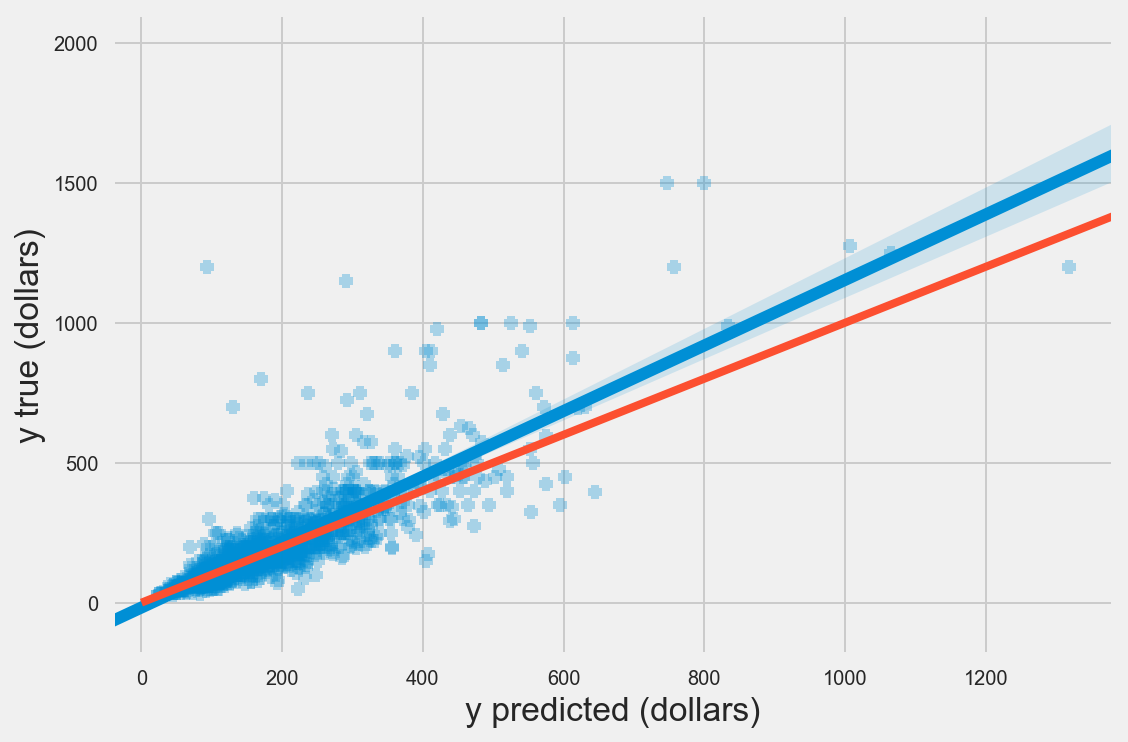

In [22]:
#sns.regplot(y_pred, y_test, marker='+', scatter_kws={'alpha':0.3})
sns.regplot(np.expm1(yl_pred), np.expm1(yl_test), marker='+', scatter_kws={'alpha':0.3})
plt.plot(range(0,2000), range(0,2000))
plt.xlabel('y predicted (dollars)')
plt.ylabel('y true (dollars)');
# plt.xlim((0,3000))
# plt.ylim((0,3000));

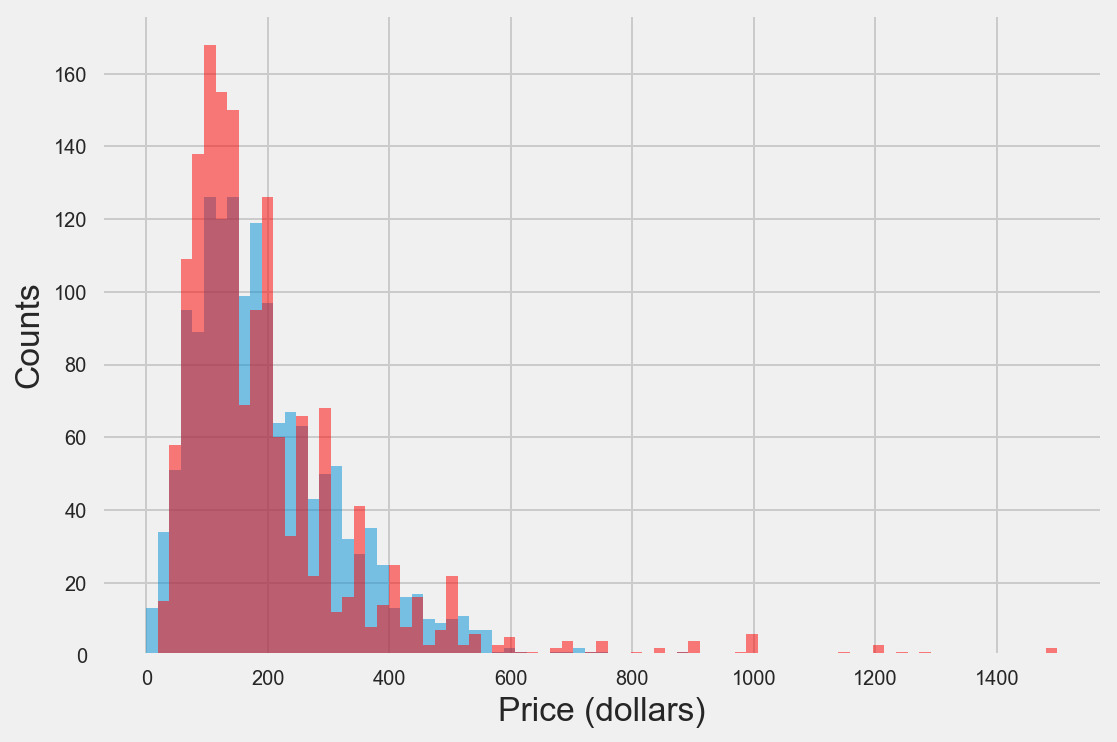

In [23]:
plt.hist(y_pred, bins=np.linspace(0,1500, num=80), alpha=0.5)
plt.hist(y_test, bins=np.linspace(0,1500, num=80), alpha=0.5, color='r')
plt.xlabel('Price (dollars)')
plt.ylabel('Counts');
# plt.hist(np.expm1(y_pred), bins=np.linspace(0,3000, num=80), alpha=0.5)
# plt.hist(np.expm1(y_test), bins=np.linspace(0,3000, num=80), alpha=0.5, color='r');

#### Random Forest

In [24]:
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)

rfr.score(X_test, y_test)

94.1703463833
51.0389171484
27.002


0.6555256909519156

In [25]:
rfrl = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfrl.fit(Xl_train, yl_train)
yl_pred = rfrl.predict(Xl_test)

print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))
rfrl.score(Xl_test, yl_test)

92.6109881634
48.3977971741
25.6415232559


0.77286833854822012

In [26]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   15.992
Percent within 10 of price:  31.021
Percent within 20 of price:  55.363

Median error (percent):      17.416

Percent within 5 of price:   17.277
Percent within 10 of price:  31.920
Percent within 20 of price:  57.547

Median error (percent):      16.908


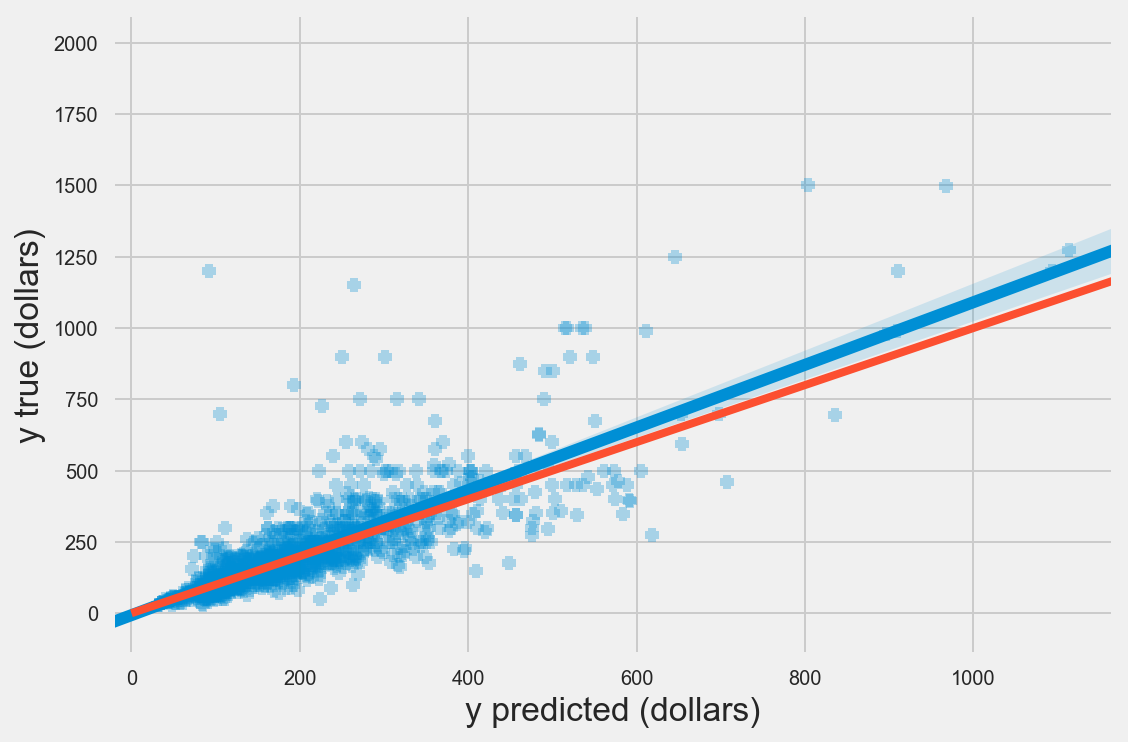

In [27]:
# sns.regplot(y_pred, y_test, marker='+', scatter_kws={'alpha':0.3})
sns.regplot(np.expm1(yl_pred), np.expm1(yl_test), marker='+', scatter_kws={'alpha':0.3})
plt.plot(range(0,2000), range(0,2000))
plt.xlabel('y predicted (dollars)')
plt.ylabel('y true (dollars)');
# plt.xlim((0,3000))
# plt.ylim((0,3000));

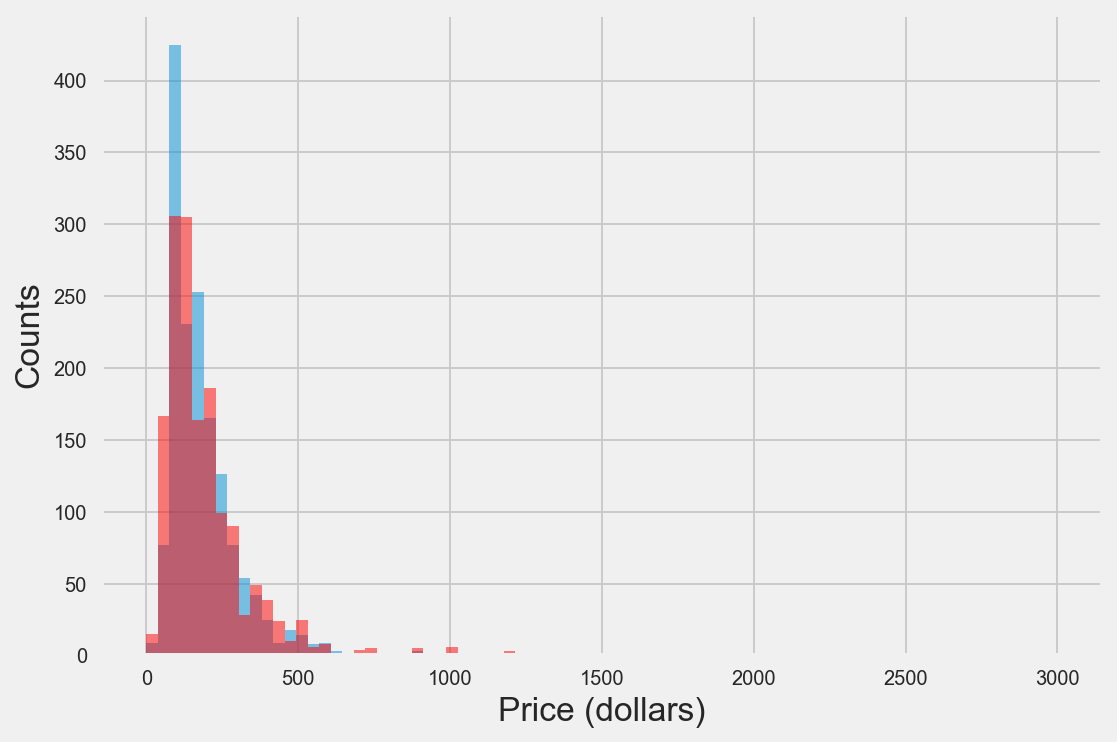

In [28]:
# plt.hist(y_pred, bins=np.linspace(0,1500, num=80), alpha=0.5)
# plt.hist(y_test, bins=np.linspace(0,1500, num=80), alpha=0.5, color='r');
plt.hist(np.expm1(yl_pred), bins=np.linspace(0,3000, num=80), alpha=0.5)
plt.hist(np.expm1(yl_test), bins=np.linspace(0,3000, num=80), alpha=0.5, color='r')
plt.xlabel('Price (dollars)')
plt.ylabel('Counts');

#### XGBoost

In [29]:
xgb = XGBRegressor(n_estimators=1000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print rmse(y_pred, y_test),
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)
xgb.score(X_test, y_test)

91.8978367508 49.5787405965
26.7289276123


0.67195072776734988

In [30]:
xgbl = XGBRegressor(n_estimators=1000)
xgbl.fit(Xl_train, yl_train)
yl_pred = xgbl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_test), np.expm1(yl_pred))
xgbl.score(Xl_test, yl_test)

86.8899081782
45.2586853184
22.4360046387


0.79847285698083403

In [31]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   15.350
Percent within 10 of price:  29.544
Percent within 20 of price:  53.629

Median error (percent):      18.404

Percent within 5 of price:   17.662
Percent within 10 of price:  34.104
Percent within 20 of price:  59.024

Median error (percent):      15.589


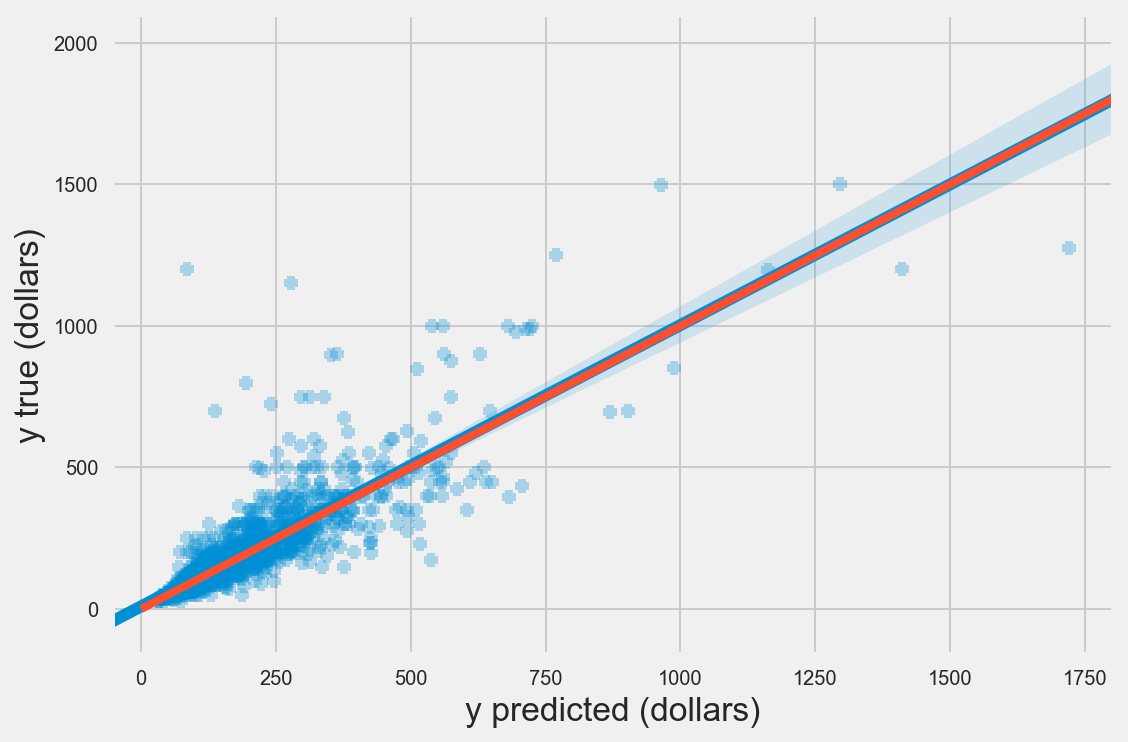

In [32]:
# sns.regplot(y_pred, y_test, marker='+', scatter_kws={'alpha':0.3})
sns.regplot(np.expm1(yl_pred), np.expm1(yl_test), marker='+', scatter_kws={'alpha':0.3})
plt.plot(range(0,2000), range(0,2000))
plt.xlabel('y predicted (dollars)')
plt.ylabel('y true (dollars)');
# plt.xlim((0,3000))
# plt.ylim((0,3000));

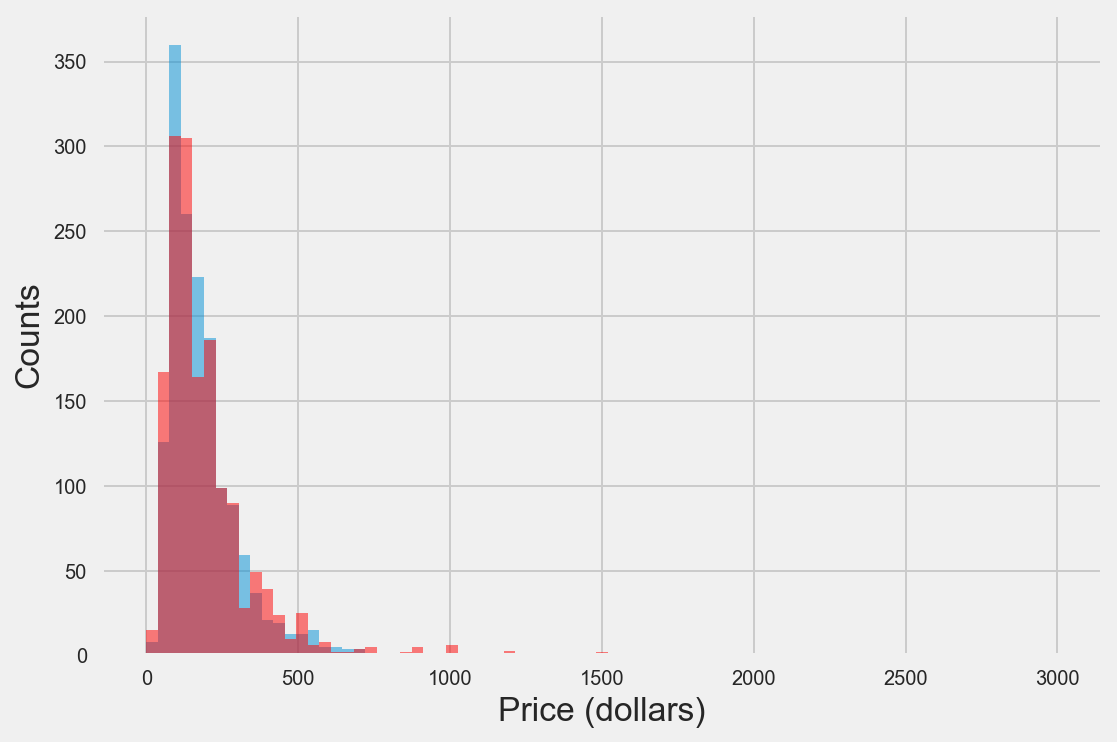

In [33]:
# plt.hist(y_pred, bins=np.linspace(0,1500, num=80), alpha=0.5)
# plt.hist(y_test, bins=np.linspace(0,1500, num=80), alpha=0.5, color='r');
plt.hist(np.expm1(yl_pred), bins=np.linspace(0,3000, num=80), alpha=0.5)
plt.hist(np.expm1(yl_test), bins=np.linspace(0,3000, num=80), alpha=0.5, color='r')
plt.xlabel('Price (dollars)')
plt.ylabel('Counts');

#### ExtraTrees

In [34]:
etr = ExtraTreesRegressor(n_jobs=-1, n_estimators=400, bootstrap=True)
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)
etr.score(X_test, y_test)

90.7258004854
49.1032129094
25.945


0.68026504402519539

In [35]:
etrl = ExtraTreesRegressor(n_jobs=-1, n_estimators=400, bootstrap=True)
etrl.fit(Xl_train, yl_train)
yl_pred = etrl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))
etrl.score(Xl_test, yl_test)


90.7395947184
46.8159819441
23.724914405


0.78275727431446906

In [36]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   17.084
Percent within 10 of price:  31.021
Percent within 20 of price:  56.262

Median error (percent):      16.966

Percent within 5 of price:   17.598
Percent within 10 of price:  33.462
Percent within 20 of price:  58.574

Median error (percent):      16.003


#### Gradient Boosted Trees

In [37]:
gbr = GradientBoostingRegressor(n_estimators=300)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)
gbr.score(X_test, y_test)

88.4804724491
48.5763378793
26.7042442268


0.69589513510652234

In [38]:
gbrl = GradientBoostingRegressor(n_estimators=300)
gbrl.fit(Xl_train, yl_train)
yl_pred = gbrl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))
gbrl.score(Xl_test, yl_test)

82.7978834425
43.3810452816
22.4390243387


0.80670869695869518

In [39]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   15.671
Percent within 10 of price:  31.214
Percent within 20 of price:  54.078

Median error (percent):      17.986

Percent within 5 of price:   18.882
Percent within 10 of price:  36.031
Percent within 20 of price:  59.088

Median error (percent):      15.714


In [41]:
def median_absolute_error_log(y_true, y_pred):
    return np.median(np.abs(np.expm1(y_pred) - np.expm1(y_true)))

med_abs_err_log = make_scorer(median_absolute_error_log, greater_is_better=False)

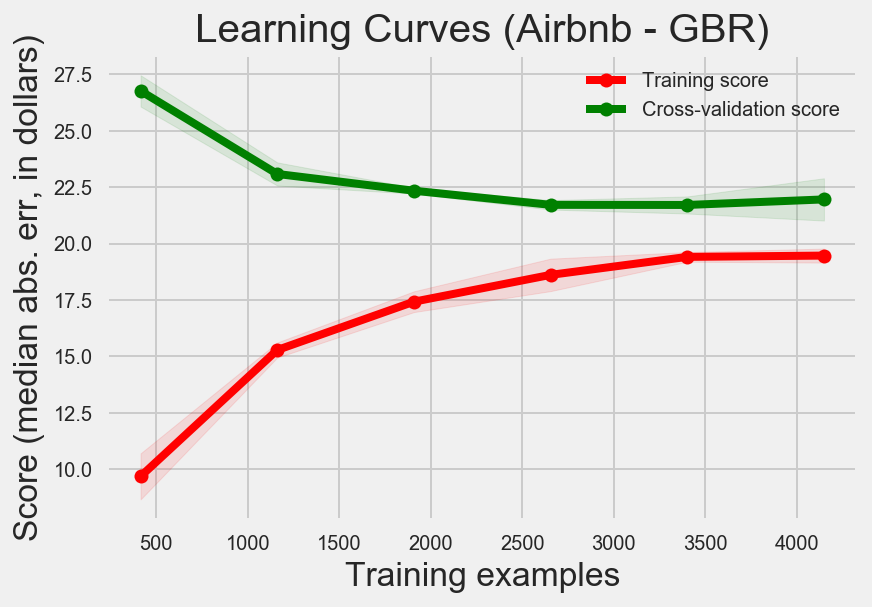

In [46]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 6)):
    plt.figure()
    plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score (median abs. err, in dollars)")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
        scoring=med_abs_err_log)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(np.abs(train_sizes), np.abs(train_scores_mean - train_scores_std),
                     np.abs(train_scores_mean + train_scores_std), alpha=0.1,
                     color="r")
    plt.fill_between(np.abs(train_sizes), np.abs(test_scores_mean - test_scores_std),
                     np.abs(test_scores_mean + test_scores_std), alpha=0.1, color="g")
    plt.plot(train_sizes, np.abs(train_scores_mean), 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, np.abs(test_scores_mean), 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
gbrl = GradientBoostingRegressor(n_estimators=400, max_depth=3, max_features='sqrt', 
                                 min_samples_leaf=3, min_samples_split=5)
title = "Learning Curves (Airbnb - GBR)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=100)
plot_learning_curve(gbrl, title, X, yl, (0.1, 1.01), cv=cv, n_jobs=4)
plt.grid(True)
#plt.ylim((0,0.4))
#plt.savefig('bnb_best_gbr_median_ae_LC_vq.pdf')
plt.show()

It is pretty strange that the training error increases. Could be an indication that the model is easily overfitted with a small number of samples.

## Property (tax roll) models (log_transform comparison)

In [50]:
res_rolls_cut = pd.read_pickle('./res_rolls_cut')
# res_rolls_cut = pd.read_pickle('./res_rolls_cut_geo')
res_rolls_test = pd.DataFrame(res_rolls_cut)
res_rolls_test = res_rolls_test[(res_rolls_test.land_and_impro_val > 100000) & 
                                (res_rolls_test.land_and_impro_val < 7000000)]
res_rolls_test.shape

(293224, 13)

(293224, 13)


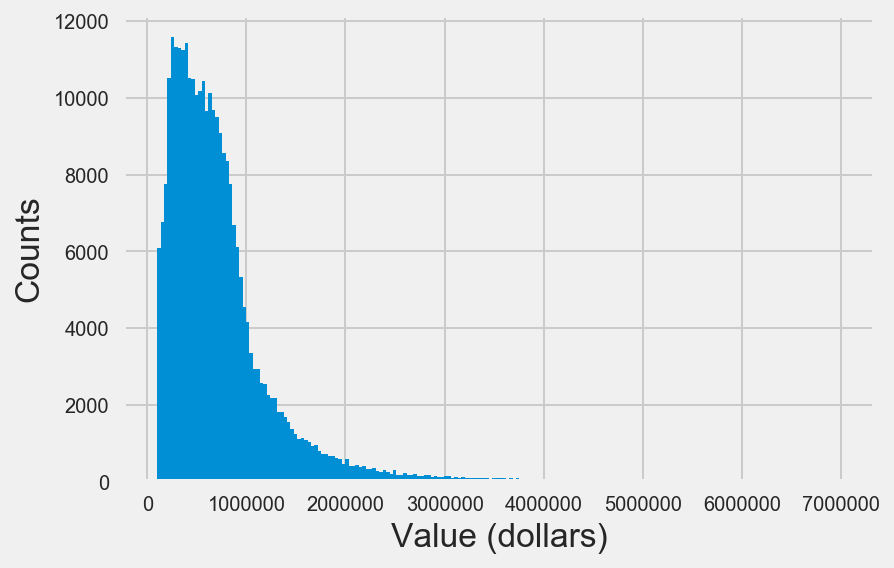

In [52]:
print res_rolls_test.shape
res_rolls_test.land_and_impro_val.hist(bins=200)
plt.xlabel('Value (dollars)')
plt.ylabel('Counts');

In [53]:
# res_rolls_test = compile_model_data('crime and 311', res_rolls_test, short_311_cats, 
#                                     short_crime_cats, crime_15up, rec_15up, 
#                                     r_crime=0.003, r_311=0.003)
# res_rolls_test.shape

In [54]:
# res_rolls_test = find_neigh_cnt('park_reg_pts', park_reg_pts, res_rolls_test, r=0.004)


In [55]:
# res_rolls_test = find_neigh_cnt('ldn_76', ldn_76, res_rolls_test, r=0.001)
# res_rolls_test = find_neigh_cnt('ldn_74', ldn_74, res_rolls_test, r=0.001)
# res_rolls_test = find_neigh_cnt('ldn_72', ldn_72, res_rolls_test, r=0.001)
# res_rolls_test = find_neigh_cnt('ldn_70', ldn_70, res_rolls_test, r=0.001)
# res_rolls_test = find_neigh_cnt('ldn_66', ldn_66, res_rolls_test, r=0.001)

In [56]:
# Predictors and target

drop_cols = ['latitude', 'longitude', 'land_and_impro_val', 'geometry', 'census_tract']
keep_cols = [x for x in res_rolls_test.columns.values if x not in drop_cols]
X = res_rolls_test[keep_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)

y = res_rolls_test.land_and_impro_val.values
yl = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X, yl, test_size=0.25, random_state=100)


#### Linear Regression

In [57]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)

linreg.score(X_test, y_test)

578604.417673
364454.013268
267921.778589


0.18464384843542045

In [58]:
linregl = LinearRegression()
linregl.fit(Xl_train, yl_train)
yl_pred = linregl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))

linregl.score(Xl_test, yl_test)

2.05396322261e+13
107285188604.0
240403.728939


0.13819259561273955

In [59]:
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

240403.728939
Percent within 5 of price:   6.604
Percent within 10 of price:  13.244
Percent within 20 of price:  26.298

Median error (percent):      40.762

Percent within 5 of price:   5.392
Percent within 10 of price:  10.893
Percent within 20 of price:  23.100

Median error (percent):      39.822


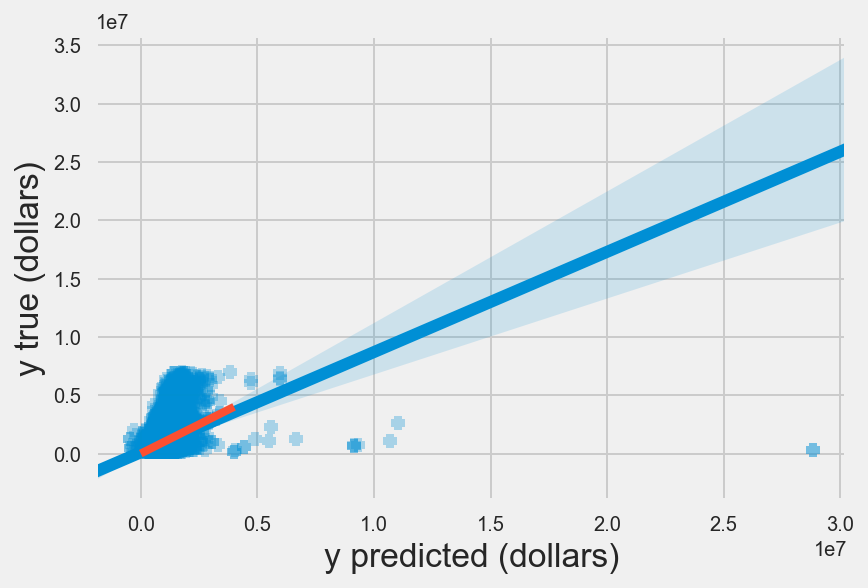

In [62]:
sns.regplot(y_pred, y_test, marker='+', scatter_kws={'alpha':0.3})
# sns.regplot(np.expm1(y_pred), np.expm1(y_test), marker='+', scatter_kws={'alpha':0.3})
plt.plot(range(0,4000000), range(0,4000000));
plt.xlabel('y predicted (dollars)')
plt.ylabel('y true (dollars)');

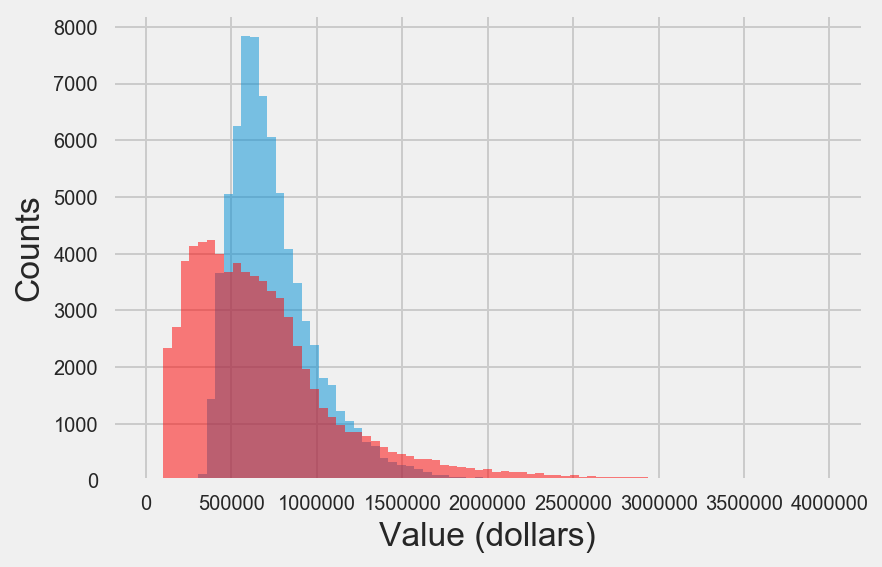

In [63]:
plt.hist(y_pred, bins=np.linspace(0,4000000, num=80), alpha=0.5)
plt.hist(y_test, bins=np.linspace(0,4000000, num=80), alpha=0.5, color='r')
# plt.hist(np.expm1(y_pred), bins=np.linspace(0,3000, num=80), alpha=0.5)
# plt.hist(np.expm1(y_test), bins=np.linspace(0,3000, num=80), alpha=0.5, color='r')
plt.xlabel('Value (dollars)')
plt.ylabel('Counts');

#### Random Forest

In [64]:
rfr = RandomForestRegressor(n_jobs= 4, n_estimators= 600, 
                            min_samples_split= 2, min_samples_leaf= 1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)

rfr.score(X_test, y_test)

267450.788665
130006.984464
54362.0685616


0.82579058292453733

In [65]:
rfrl = RandomForestRegressor(n_jobs= 4, n_estimators= 600,
                            min_samples_split= 2, min_samples_leaf= 1)
rfrl.fit(Xl_train, yl_train)
yl_pred = rfrl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))

rfrl.score(Xl_test, yl_test)

280182.37076
131931.995264
49862.4120781


0.79907062461636724

In [68]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   34.306
Percent within 10 of price:  52.876
Percent within 20 of price:  70.803

Median error (percent):      8.965

Percent within 5 of price:   36.132
Percent within 10 of price:  54.822
Percent within 20 of price:  72.034

Median error (percent):      8.283


Used grid search below to find the best parameters for the Random Forest model. It turns out the best parameters for the final model, with all geospatial data added, are the same as the default model with a higher number of estimators.

In [22]:
params = {'n_estimators': (500, 600, 700),
          'min_samples_split': (2, 3, 4, 5, 6),
          'min_samples_leaf': (1, 2, 3)}

rfrl = RandomForestRegressor(n_jobs=-1)
gs_rfrl = GridSearchCV(rfrl, params, verbose=6, pre_dispatch=2)
gs_rfrl.fit(Xl_train, yl_train)
gs_rfrl.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] min_samples_split=2, n_estimators=500, min_samples_leaf=1 .......
[CV]  min_samples_split=2, n_estimators=500, min_samples_leaf=1, score=0.804524, total=  53.0s
[CV] min_samples_split=2, n_estimators=500, min_samples_leaf=1 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.0s remaining:    0.0s


[CV]  min_samples_split=2, n_estimators=500, min_samples_leaf=1, score=0.812728, total=  53.0s
[CV] min_samples_split=2, n_estimators=500, min_samples_leaf=1 .......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  min_samples_split=2, n_estimators=500, min_samples_leaf=1, score=0.805396, total=  52.6s
[CV] min_samples_split=2, n_estimators=600, min_samples_leaf=1 .......


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min remaining:    0.0s


[CV]  min_samples_split=2, n_estimators=600, min_samples_leaf=1, score=0.804747, total= 1.0min
[CV] min_samples_split=2, n_estimators=600, min_samples_leaf=1 .......


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.8min remaining:    0.0s


[CV]  min_samples_split=2, n_estimators=600, min_samples_leaf=1, score=0.812638, total= 1.0min
[CV] min_samples_split=2, n_estimators=600, min_samples_leaf=1 .......


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.9min remaining:    0.0s


[CV]  min_samples_split=2, n_estimators=600, min_samples_leaf=1, score=0.805687, total= 1.0min
[CV] min_samples_split=2, n_estimators=700, min_samples_leaf=1 .......
[CV]  min_samples_split=2, n_estimators=700, min_samples_leaf=1, score=0.804779, total= 1.2min
[CV] min_samples_split=2, n_estimators=700, min_samples_leaf=1 .......
[CV]  min_samples_split=2, n_estimators=700, min_samples_leaf=1, score=0.812707, total= 1.2min
[CV] min_samples_split=2, n_estimators=700, min_samples_leaf=1 .......
[CV]  min_samples_split=2, n_estimators=700, min_samples_leaf=1, score=0.805382, total= 1.2min
[CV] min_samples_split=3, n_estimators=500, min_samples_leaf=1 .......
[CV]  min_samples_split=3, n_estimators=500, min_samples_leaf=1, score=0.803880, total=  51.7s
[CV] min_samples_split=3, n_estimators=500, min_samples_leaf=1 .......
[CV]  min_samples_split=3, n_estimators=500, min_samples_leaf=1, score=0.811706, total=  51.6s
[CV] min_samples_split=3, n_estimators=500, min_samples_leaf=1 .......
[CV]

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 135.4min finished


{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}

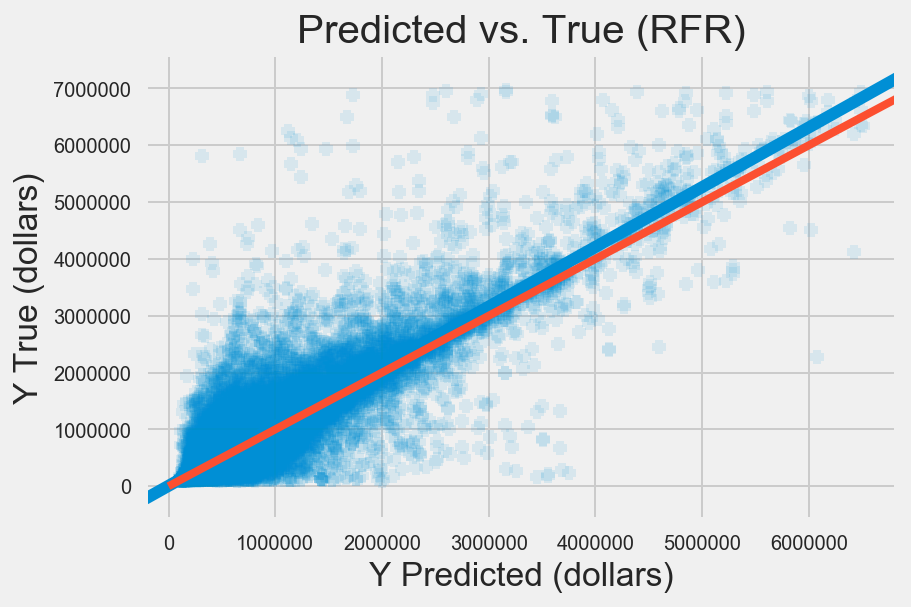

In [70]:
# sns.regplot(y_pred, y_test, marker='+', scatter_kws={'alpha':0.3})
sns.regplot(np.expm1(yl_pred), np.expm1(yl_test), marker='+', scatter_kws={'alpha':0.1})
plt.plot(range(0,7000000), range(0,7000000))
plt.xlabel('Y Predicted (dollars)')
plt.ylabel('Y True (dollars)')
plt.title('Predicted vs. True (RFR)')
#plt.savefig('ass_pred_true_rfr_best_.pdf', facecolor='w')
plt.show();
# plt.xlim((0,3000))
# plt.ylim((0,3000));

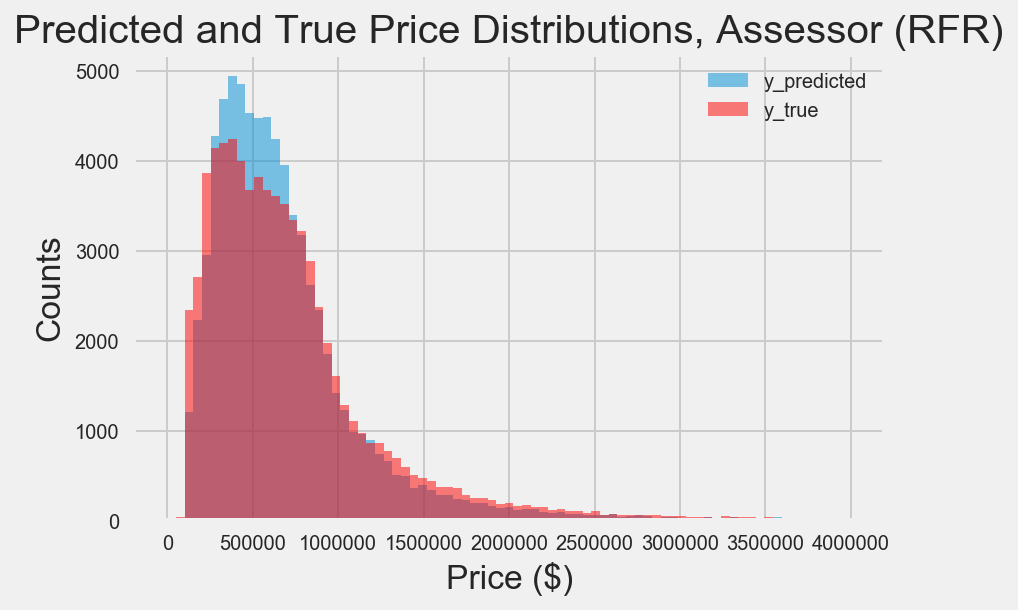

In [71]:
# plt.hist(y_pred, bins=np.linspace(0,1500, num=80), alpha=0.5)
# plt.hist(y_test, bins=np.linspace(0,1500, num=80), alpha=0.5, color='r');
plt.hist(np.expm1(yl_pred), bins=np.linspace(0,4000000, num=80), alpha=0.5, label='y_predicted')
plt.hist(np.expm1(yl_test), bins=np.linspace(0,4000000, num=80), alpha=0.5, color='r', label='y_true')
plt.title('Predicted and True Price Distributions, Assessor (RFR)')
plt.xlabel('Price ($)')
plt.ylabel('Counts')
plt.legend()
#plt.savefig('ass_pred_true_dists_rfr_best_.pdf', facecolor='w')
plt.show();

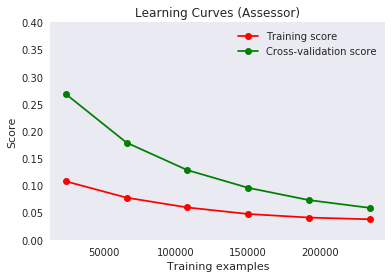

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 6)):
    plt.figure()
    plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
        scoring="neg_median_absolute_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, np.abs(train_scores_mean), 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, np.abs(test_scores_mean), 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

rfrl = RandomForestRegressor(n_estimators=600, n_jobs=-1, 
                             min_samples_split=2, min_samples_leaf=1)
title = "Learning Curves (Assessor)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=100)
plot_learning_curve(rfrl, title, X, yl, (0.1, 1.01), cv=cv)
plt.ylim((0,0.4))
#plt.savefig('ass_best_rfr_median_ae_LC_v2.pdf')
plt.show()

#### XGBoost

In [72]:
xgb = XGBRegressor(n_estimators=1000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)
xgb.score(X_test, y_test)

468983.513145
315602.034052
225122.9375


0.46432791744804347

In [73]:
xgbl = XGBRegressor(n_estimators=1000)
xgbl.fit(Xl_train, yl_train)
yl_pred = xgbl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))

xgbl.score(Xl_test, yl_test)

500065.509699
312159.701812
205969.796875


0.34521138578989652

In [74]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   7.289
Percent within 10 of price:  14.707
Percent within 20 of price:  29.306

Median error (percent):      34.898

Percent within 5 of price:   6.757
Percent within 10 of price:  13.516
Percent within 20 of price:  27.823

Median error (percent):      35.277


#### ExtraTrees

In [75]:
etr = ExtraTreesRegressor(n_jobs= 4, n_estimators= 400, bootstrap= True)
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)

etr.score(X_test, y_test)

267493.45342
131543.602702
54851.7644453


0.82573499741040668

In [76]:
etrl = ExtraTreesRegressor(n_jobs= 4, n_estimators= 400, bootstrap= True)
etrl.fit(Xl_train, yl_train)
yl_pred = etrl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))

etrl.score(Xl_test, yl_test)

283238.590061
133849.965963
50861.8811828


0.79572410125244053

In [77]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   34.203
Percent within 10 of price:  52.524
Percent within 20 of price:  70.402

Median error (percent):      9.070

Percent within 5 of price:   35.627
Percent within 10 of price:  54.348
Percent within 20 of price:  71.659

Median error (percent):      8.427


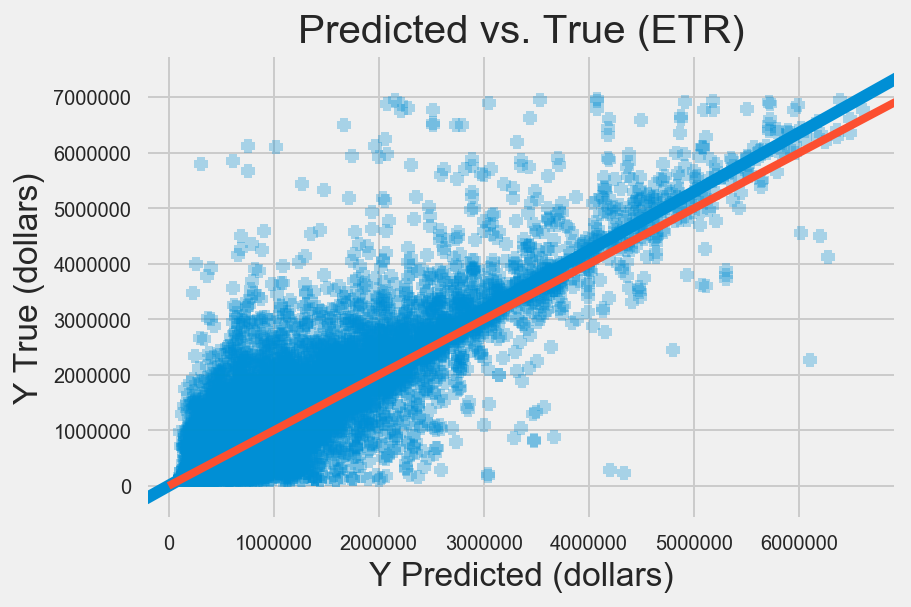

In [82]:
# sns.regplot(y_pred, y_test, marker='+', scatter_kws={'alpha':0.3})
sns.regplot(np.expm1(yl_pred), np.expm1(yl_test), marker='+', scatter_kws={'alpha':0.3})
plt.plot(range(0,7000000), range(0,7000000))
plt.xlabel('Y Predicted (dollars)')
plt.ylabel('Y True (dollars)')
plt.title('Predicted vs. True (ETR)')
plt.show();

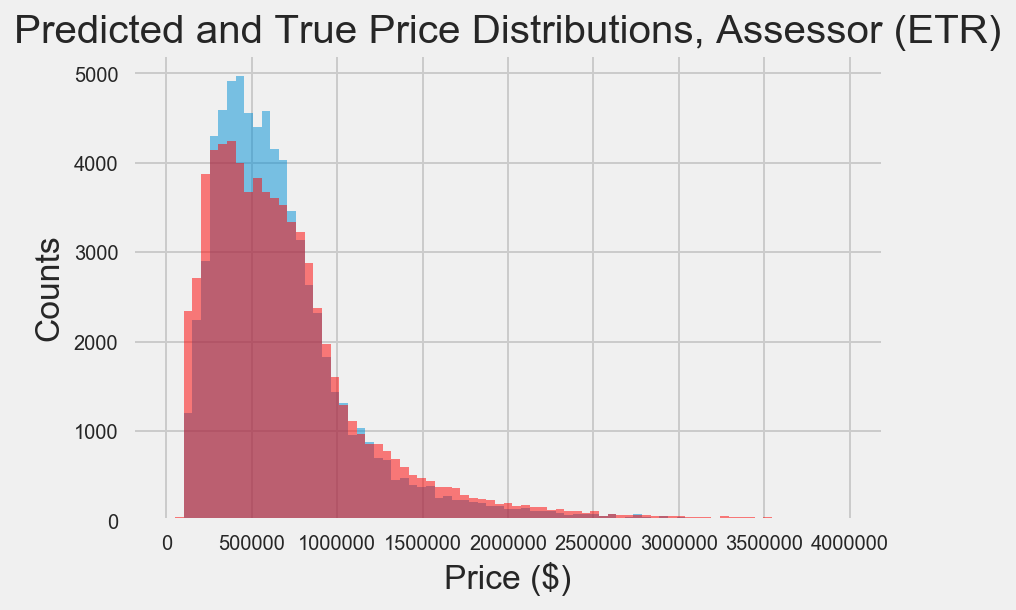

In [84]:
# plt.hist(y_pred, bins=np.linspace(0,1500, num=80), alpha=0.5)
# plt.hist(y_test, bins=np.linspace(0,1500, num=80), alpha=0.5, color='r');
plt.hist(np.expm1(yl_pred), bins=np.linspace(0,4000000, num=80), alpha=0.5)
plt.hist(np.expm1(yl_test), bins=np.linspace(0,4000000, num=80), alpha=0.5, color='r')
plt.title('Predicted and True Price Distributions, Assessor (ETR)')
plt.xlabel('Price ($)')
plt.ylabel('Counts')
plt.legend()
plt.show();

#### Gradient Boosted Trees

In [85]:
gbr = GradientBoostingRegressor(n_estimators=300)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print rmse(y_pred, y_test)
print mae(y_pred, y_test)
print median_absolute_error(y_test, y_pred)
gbr.score(X_test, y_test)

485959.531747
324846.09376
230707.612696


0.42484609653816163

In [86]:
gbrl = GradientBoostingRegressor(n_estimators=300)
gbrl.fit(Xl_train, yl_train)
yl_pred = gbrl.predict(Xl_test)
print rmse(np.expm1(yl_pred), np.expm1(yl_test))
print mae(np.expm1(yl_pred), np.expm1(yl_test))
print median_absolute_error(np.expm1(yl_pred), np.expm1(yl_test))
gbrl.score(Xl_test, yl_test)

516833.548381
320888.731174
212574.415165


0.31958590358986161

In [87]:
print_percents(y_pred, y_test)
print_percents_log(yl_pred, yl_test)

Percent within 5 of price:   7.177
Percent within 10 of price:  14.296
Percent within 20 of price:  28.594

Median error (percent):      35.692

Percent within 5 of price:   6.375
Percent within 10 of price:  12.906
Percent within 20 of price:  26.741

Median error (percent):      36.263


See the 'crime_311_parks_noise_model_aws' notebook for the models that incorporate the geospatial data with optimized parameters.